# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress


# Import custom function 
from functions import run_linear_regression

# Import API keys
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Create a variable for the Output File (CSV)
imp_output_data_file = "Output/City_Data_Farenheit.csv"

# Create a variable for the Output File (CSV)
met_output_data_file = "Output/City_Data_Celsius.csv"

# Define the Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)




## Generate Cities List

In [2]:
# Create lists for latitudes/longitudes and cities 
my_lat_lngs = []
my_cities = []

# Create a set of random latitude and longitude combinations
my_lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
my_lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
my_lat_lngs = zip(my_lats, my_lngs)


# Identify nearest city for each latitude, longitude combination
for lat_lng in my_lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in my_cities:
        my_cities.append(city)

# Print the city count to confirm sufficient count
print(len(my_cities))

   

581


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Define the variables to be used in the request query
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Create the Lists to be used in the Dictionary for the Data Frame
imp_city = []
imp_cloudiness = []
imp_country = []
imp_date = []
imp_humidity = []
imp_lat = []
imp_lng = []
imp_maxtemp = []
imp_windspeed = []




# Loop through the entire list of cities and request data for each city
for city in my_cities:
    try:
        imp_response = requests.get(query_url + city).json()
        imp_city.append(imp_response['name'])
        imp_cloudiness.append(imp_response['clouds']['all'])
        imp_country.append(imp_response['sys']['country'])
        imp_date.append(imp_response['dt'])
        imp_humidity.append(imp_response['main']['humidity'])
        imp_lat.append(imp_response['coord']['lat'])
        imp_lng.append(imp_response['coord']['lon'])
        imp_maxtemp.append(imp_response['main']['temp_max'])
        imp_windspeed.append(imp_response['wind']['speed'])
        print(f"Processing record for {city}")
        time.sleep(2)
    except Exception:
        print(f"City not found -- Skipping: {city}")
        
print("------------------------------\nData Retrieval Complete\n------------------------------")

print()
print()
print(imp_response.keys())


Processing record for nicoya
Processing record for port elizabeth
Processing record for leningradskiy
Processing record for fortuna
Processing record for hirado
Processing record for new norfolk
Processing record for norman wells
Processing record for vostok
Processing record for busselton
Processing record for kavieng
Processing record for kaitangata
Processing record for scarborough
Processing record for georgetown
Processing record for hwange
Processing record for weston
Processing record for bluff
Processing record for bikaner
Processing record for gawler
Processing record for varhaug
Processing record for constitucion
Processing record for mayo
Processing record for dikson
Processing record for sinnamary
Processing record for hasaki
Processing record for aginskoye
City not found -- Skipping: mys shmidta
Processing record for coihaique
Processing record for hermanus
City not found -- Skipping: palabuhanratu
Processing record for upernavik
Processing record for ushuaia
Processing re

Processing record for praia
Processing record for aswan
Processing record for fort nelson
Processing record for kruisfontein
Processing record for wewak
Processing record for kasongo-lunda
City not found -- Skipping: amderma
Processing record for amapa
Processing record for purwodadi
City not found -- Skipping: karamay
Processing record for gat
Processing record for salalah
Processing record for beyla
Processing record for amalapuram
Processing record for the valley
Processing record for maragogi
Processing record for avera
Processing record for kavaratti
Processing record for okhotsk
Processing record for kahului
Processing record for reading
Processing record for srednekolymsk
Processing record for guerrero negro
Processing record for port hardy
City not found -- Skipping: taburi
Processing record for burnie
Processing record for bilma
Processing record for morant bay
Processing record for kekri
City not found -- Skipping: saleaula
Processing record for kulhudhuffushi
Processing reco

Processing record for constantine
Processing record for guilin
City not found -- Skipping: umzimvubu
Processing record for san cristobal
Processing record for weiser
Processing record for khasan
Processing record for husavik
City not found -- Skipping: rungata
Processing record for pontianak
Processing record for rexburg
Processing record for diego de almagro
Processing record for lakhdenpokhya
Processing record for waipawa
Processing record for denpasar
Processing record for mizusawa
Processing record for kabanjahe
Processing record for nishihara
Processing record for narkevychi
Processing record for mokrousovo
Processing record for agadir
Processing record for sidney
Processing record for somerset east
Processing record for douentza
City not found -- Skipping: kegayli
Processing record for flinders
Processing record for juarez
Processing record for chabahar
Processing record for innisfail
Processing record for praia da vitoria
Processing record for bekhtery
Processing record for doha

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create the dictionary to be used in the DataFrame
my_imp_weather_dictionary ={
    "City": imp_city, 
    "Cloudiness":imp_cloudiness, 
    "Country":imp_country, 
    "Date":imp_date, 
    "Humidity":imp_humidity,
    "Lat":imp_lat,
    "Lng":imp_lng,
    "Max Temp":imp_maxtemp,
    "Wind Speed":imp_windspeed
}

# Create a DataFrame from the Dictionary created above
my_imp_weather_dataframe = pd.DataFrame(my_imp_weather_dictionary)

# Exports the Data Frame to an Output File 
my_imp_weather_dataframe.to_csv(imp_output_data_file, index=False, header=True)


In [5]:
# Display the first 20 rows of the DatafRame
my_imp_weather_dataframe.head(20)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,22,NZ,1583966825,88,-46.19,168.86,54.00,4.00
1,Tiksi,0,RU,1583966827,75,71.69,128.87,-17.27,11.90
2,Fortuna,1,US,1583966829,81,40.60,-124.16,57.00,17.22
3,Kahului,40,US,1583966595,61,20.89,-156.47,78.80,3.36
4,Kaitangata,11,NZ,1583966834,79,-46.28,169.85,53.82,12.44
5,Grindavik,90,IS,1583966836,80,63.84,-22.43,32.00,29.97
6,East London,98,ZA,1583966838,83,-33.02,27.91,72.50,13.15
7,Kavieng,63,PG,1583966840,73,-2.57,150.80,84.29,10.40
8,Sitka,75,US,1583966842,86,57.05,-135.33,37.40,10.16
9,Kapaa,20,US,1583966844,65,22.08,-159.32,78.80,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

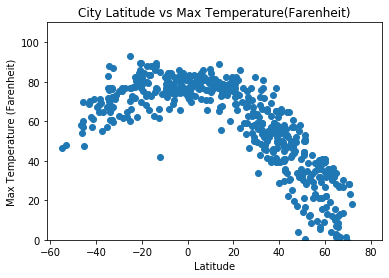

In [5]:
# Create a variable x that contains the X Axis values
x_values = my_imp_weather_dataframe["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_weather_dataframe["Max Temp"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values   
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(0, 110)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Max Temperature (Farenheit)")

# Assign a Title to the Scatter Plot
plt.title("City Latitude vs Max Temperature(Farenheit)")

# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_CITY_Latitude_vs_MaxTemp_Farenheit.png")

# Display the Scatter plot 
plt.show()



#### Latitude vs. Humidity Plot

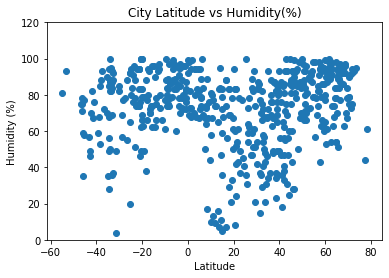

In [6]:
# Create a variable x that contains the X Axis values
x_values = my_imp_weather_dataframe["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_weather_dataframe["Humidity"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values  
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(0, 120)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Humidity (%)")

# Assign a Title to the Scatter Plot
plt.title("City Latitude vs Humidity(%)")

# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_CITY_Latitude_vs_Humidity.png")

# Display the Scatter plot 
plt.show()


#### Latitude vs. Cloudiness Plot

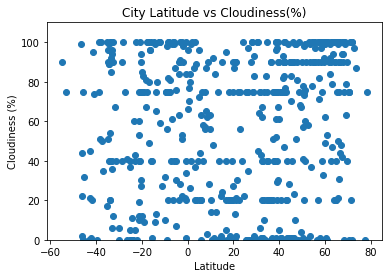

In [7]:
# Create a variable x that contains the X Axis values
x_values = my_imp_weather_dataframe["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_weather_dataframe["Cloudiness"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values  
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(0, 110)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Cloudiness (%)")

# Assign a Title to the Scatter Plot
plt.title("City Latitude vs Cloudiness(%)")

# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_CITY_Latitude_vs_Cloudiness.png")

# Display the Scatter plot 
plt.show()


#### Latitude vs. Wind Speed Plot

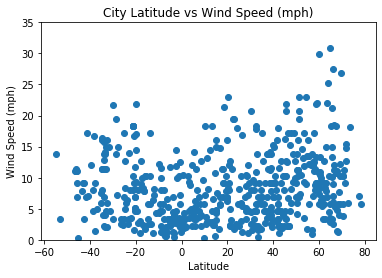

In [8]:
# Create a variable x that contains the X Axis values
x_values = my_imp_weather_dataframe["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_weather_dataframe["Wind Speed"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values 
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(0, 35)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Wind Speed (mph)")

# Assign a Title to the Scatter Plot
plt.title("City Latitude vs Wind Speed (mph)")

# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_CITY_Latitude_vs_WindSpeed.png")

# Display the Scatter plot 
plt.show()


## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
# The function has been created and saved in a file called functions.py 
# This is referenced at the beginning of the jupyter notebook


In [9]:
# Create Northern and Southern Hemisphere DataFrames
my_imp_northern_hemisphere_df = my_imp_weather_dataframe.loc[my_imp_weather_dataframe["Lat"] > 0] 
my_imp_southern_hemisphere_df = my_imp_weather_dataframe.loc[my_imp_weather_dataframe["Lat"] < 0] 

print("===========================================================================================")
print(" NORTHERN HEMISPHERE DATAFRAME HEADER")
print("===========================================================================================")
print()
print()
print(my_imp_northern_hemisphere_df.head())
print()
print()
print(f"The number of cities retrieved for the northern hemisphere = {len(my_imp_northern_hemisphere_df)}")
print()
print()

print()
print()
print("===========================================================================================")
print(" SOUTHERN HEMISPHERE DATAFRAME HEADER")
print("===========================================================================================")
print()
print()
print(my_imp_southern_hemisphere_df.head())
print()
print()
print(f"The number of cities retrieved for the southern hemisphere = {len(my_imp_southern_hemisphere_df)}")
print()



 NORTHERN HEMISPHERE DATAFRAME HEADER


            City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0         Nicoya          20      CR  1583973964        58  10.15  -85.45   
2  Leningradskiy          63      RU  1583973441        78  69.38  178.42   
3        Fortuna           1      US  1583974003        76  40.60 -124.16   
4         Hirado          10      JP  1583974005        57  33.36  129.55   
6   Norman Wells          75      CA  1583974010        70  65.28 -126.83   

   Max Temp  Wind Speed  
0     84.20       18.34  
2     -8.52       12.17  
3     57.00       14.99  
4     51.80        2.24  
6     -5.80       18.34  


The number of cities retrieved for the northern hemisphere = 365




 SOUTHERN HEMISPHERE DATAFRAME HEADER


              City  Cloudiness Country        Date  Humidity    Lat     Lng  \
1   Port Elizabeth          90      ZA  1583973904        88 -33.92   25.57   
5      New Norfolk          45      AU  1583974008        49 -42.78  147

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The Regression Line equation is: Max Temperature = -1.24 times Latitude + 94.85
The Correlation (R) between Latitude and the Max Temperature is: -0.88
The Coefficient of Determination (R-Squared) between Latitude and the Max Temperature is 0.7744


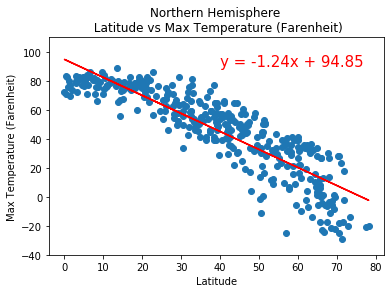

In [10]:
# Create a variable x that contains the X Axis values
x_values = my_imp_northern_hemisphere_df["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_northern_hemisphere_df["Max Temp"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(-40, 110)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Max Temperature (Farenheit)")

# Assign a Title to the Scatter Plot
plt.title("Northern Hemisphere \n Latitude vs Max Temperature (Farenheit)")



#=============================================================
# Use a Custom Function "run_linear_regression" 
#=============================================================

# Run the custom function and assign the results to a variable 
my_LR_dict_NH_temp_lat = run_linear_regression(x_values,y_values)

# Plot the Regression Line on the Scatter Plot 
plt.plot(x_values,my_LR_dict_NH_temp_lat["regress_values"],"-", color="red")

# Plot the Equatrion of the Regression Line on the Scatter Plot
plt.annotate(my_LR_dict_NH_temp_lat["line_eq"],(40,90),fontsize=15,color="red")

# Print the correlation coefficient (R), the coefficient of determination (R Squared) and the equation of the Regression Line
print( "The Regression Line equation is: Max Temperature = " + str(round((my_LR_dict_NH_temp_lat["slope"]),2)) + " times Latitude + " + str(round((my_LR_dict_NH_temp_lat["intercept"]),2)) ) 
print( "The Correlation (R) between Latitude and the Max Temperature is: " + str(round((my_LR_dict_NH_temp_lat["rvalue"]),2))  ) 
print( "The Coefficient of Determination (R-Squared) between Latitude and the Max Temperature is " + str( round( round((my_LR_dict_NH_temp_lat["rvalue"]),2) * round((my_LR_dict_NH_temp_lat["rvalue"]),2),4) )) 


#=============================================================
# End of use of the Custom Function
#=============================================================


# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_NORTHERN_HEMISPHERE_Latitude_vs_MaxTemp_Farenheit.png")

# Display the Scatter plot 
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The Regression Line equation is: Max Temperature = 0.4 times Latitude + 82.74
The Correlation (R) between Latitude and the Max Temperature is: 0.58
The Coefficient of Determination (R-Squared) between Latitude and the Max Temperature is 0.3364


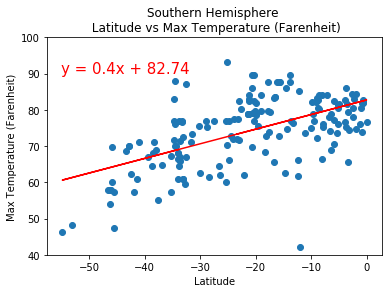

In [11]:
# Create a variable x that contains the X Axis values
x_values = my_imp_southern_hemisphere_df["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_southern_hemisphere_df["Max Temp"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(40, 100)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Max Temperature (Farenheit)")

# Assign a Title to the Scatter Plot
plt.title("Southern Hemisphere \n Latitude vs Max Temperature (Farenheit)")


#=============================================================
# Use a Custom Function "run_linear_regression" 
#=============================================================

# Run the custom function and assign the results to a variable 
my_LR_dict_SH_temp_lat = run_linear_regression(x_values,y_values)

# Plot the Regression Line on the Scatter Plot 
plt.plot(x_values,my_LR_dict_SH_temp_lat["regress_values"],"-", color="red")

# Plot the Equatrion of the Regression Line on the Scatter Plot
plt.annotate(my_LR_dict_SH_temp_lat["line_eq"],(-55,90),fontsize=15,color="red")

# Print the correlation coefficient (R), the coefficient of determination (R Squared) and the equation of the Regression Line
print( "The Regression Line equation is: Max Temperature = " + str(round((my_LR_dict_SH_temp_lat["slope"]),2)) + " times Latitude + " + str(round((my_LR_dict_SH_temp_lat["intercept"]),2)) ) 
print( "The Correlation (R) between Latitude and the Max Temperature is: " + str(round((my_LR_dict_SH_temp_lat["rvalue"]),2))  ) 
print( "The Coefficient of Determination (R-Squared) between Latitude and the Max Temperature is " + str( round( round((my_LR_dict_SH_temp_lat["rvalue"]),2) * round((my_LR_dict_SH_temp_lat["rvalue"]),2),4) )) 

#=============================================================
# End of use of the Custom Function
#=============================================================


# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_SOUTHERN_HEMISPHERE_Latitude_vs_MaxTemp_Farenheit.png")

# Display the Scatter plot 
plt.show()


In [ ]:
#  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Regression Line equation is: Max Temperature = 0.33 times Latitude + 58.18
The Correlation (R) between Latitude and the Max Temperature is: 0.3
The Coefficient of Determination (R-Squared) between Latitude and the Max Temperature is 0.09


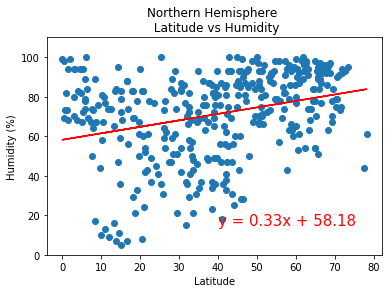

In [12]:
# Create a variable x that contains the X Axis values
x_values = my_imp_northern_hemisphere_df["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_northern_hemisphere_df["Humidity"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(0, 110)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Humidity (%)")

# Assign a Title to the Scatter Plot
plt.title("Northern Hemisphere \n Latitude vs Humidity")



#=============================================================
# Use a Custom Function "run_linear_regression" 
#=============================================================

# Run the custom function and assign the results to a variable 
my_LR_dict_NH_humidity_lat = run_linear_regression(x_values,y_values)

# Plot the Regression Line on the Scatter Plot 
plt.plot(x_values,my_LR_dict_NH_humidity_lat["regress_values"],"-", color="red")

# Plot the Equatrion of the Regression Line on the Scatter Plot
plt.annotate(my_LR_dict_NH_humidity_lat["line_eq"],(40,15),fontsize=15,color="red")

# Print the correlation coefficient (R), the coefficient of determination (R Squared) and the equation of the Regression Line
print( "The Regression Line equation is: Max Temperature = " + str(round((my_LR_dict_NH_humidity_lat["slope"]),2)) + " times Latitude + " + str(round((my_LR_dict_NH_humidity_lat["intercept"]),2)) ) 
print( "The Correlation (R) between Latitude and the Max Temperature is: " + str(round((my_LR_dict_NH_humidity_lat["rvalue"]),2))  ) 
print( "The Coefficient of Determination (R-Squared) between Latitude and the Max Temperature is " + str( round( round((my_LR_dict_NH_humidity_lat["rvalue"]),2) * round((my_LR_dict_NH_humidity_lat["rvalue"]),2),4) )) 

#=============================================================
# End of use of the Custom Function
#=============================================================



# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_NORTHERN_HEMISPHERE_Latitude_vs_Humidity.png")

# Display the Scatter plot 
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Regression Line equation is: Max Temperature = 0.38 times Latitude + 85.5
The Correlation (R) between Latitude and the Max Temperature is: 0.3
The Coefficient of Determination (R-Squared) between Latitude and the Max Temperature is 0.09


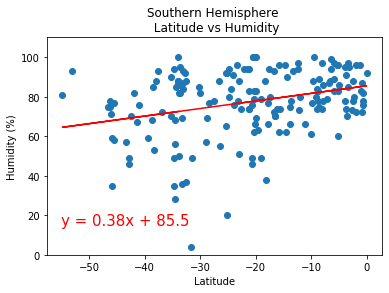

In [13]:
# Create a variable x that contains the X Axis values
x_values = my_imp_southern_hemisphere_df["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_southern_hemisphere_df["Humidity"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values  
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(0, 110)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Humidity (%)")

# Assign a Title to the Scatter Plot
plt.title("Southern Hemisphere \n Latitude vs Humidity")


#=============================================================
# Use a Custom Function "run_linear_regression" 
#=============================================================

# Run the custom function and assign the results to a variable 
my_LR_dict_SH_humidity_lat = run_linear_regression(x_values,y_values)

# Plot the Regression Line on the Scatter Plot 
plt.plot(x_values,my_LR_dict_SH_humidity_lat["regress_values"],"-", color="red")

# Plot the Equatrion of the Regression Line on the Scatter Plot
plt.annotate(my_LR_dict_SH_humidity_lat["line_eq"],(-55,15),fontsize=15,color="red")

# Print the correlation coefficient (R), the coefficient of determination (R Squared) and the equation of the Regression Line
print( "The Regression Line equation is: Max Temperature = " + str(round((my_LR_dict_SH_humidity_lat["slope"]),2)) + " times Latitude + " + str(round((my_LR_dict_SH_humidity_lat["intercept"]),2)) ) 
print( "The Correlation (R) between Latitude and the Max Temperature is: " + str(round((my_LR_dict_SH_humidity_lat["rvalue"]),2))  ) 
print( "The Coefficient of Determination (R-Squared) between Latitude and the Max Temperature is " + str( round( round((my_LR_dict_SH_humidity_lat["rvalue"]),2) * round((my_LR_dict_SH_humidity_lat["rvalue"]),2),4) )) 

#=============================================================
# End of use of the Custom Function
#=============================================================


# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_SOUTHERN_HEMISPHERE_Latitude_vs_Humidity.png")

# Display the Scatter plot 
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Regression Line equation is: Cloudiness = 0.5 times Latitude + 35.13
The Correlation (R) between Latitude and Cloudiness is: 0.27
The Coefficient of Determination (R-Squared) between Latitude and Cloudiness is 0.0729


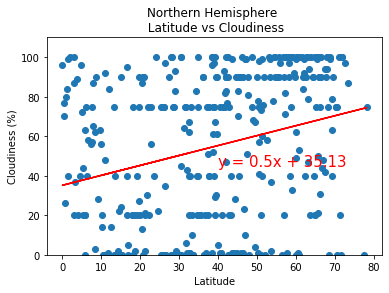

In [14]:
# Create a variable x that contains the X Axis values
x_values = my_imp_northern_hemisphere_df["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_northern_hemisphere_df["Cloudiness"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(0, 110)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Cloudiness (%)")

# Assign a Title to the Scatter Plot
plt.title("Northern Hemisphere \n Latitude vs Cloudiness")



#=============================================================
# Use a Custom Function "run_linear_regression" 
#=============================================================

# Run the custom function and assign the results to a variable 
my_LR_dict_NH_cloudiness_lat = run_linear_regression(x_values,y_values)

# Plot the Regression Line on the Scatter Plot 
plt.plot(x_values,my_LR_dict_NH_cloudiness_lat["regress_values"],"-", color="red")

# Plot the Equatrion of the Regression Line on the Scatter Plot
plt.annotate(my_LR_dict_NH_cloudiness_lat["line_eq"],(40,45),fontsize=15,color="red")

# Print the correlation coefficient (R), the coefficient of determination (R Squared) and the equation of the Regression Line
print( "The Regression Line equation is: Cloudiness = " + str(round((my_LR_dict_NH_cloudiness_lat["slope"]),2)) + " times Latitude + " + str(round((my_LR_dict_NH_cloudiness_lat["intercept"]),2)) ) 
print( "The Correlation (R) between Latitude and Cloudiness is: " + str(round((my_LR_dict_NH_cloudiness_lat["rvalue"]),2))  ) 
print( "The Coefficient of Determination (R-Squared) between Latitude and Cloudiness is " + str( round( round((my_LR_dict_NH_cloudiness_lat["rvalue"]),2) * round((my_LR_dict_NH_cloudiness_lat["rvalue"]),2),4) )) 

#=============================================================
# End of use of the Custom Function
#=============================================================



# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_NORTHERN_HEMISPHERE_Latitude_vs_Cloudiness.png")

# Display the Scatter plot 
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Regression Line equation is: Cloudiness = 0.34 times Latitude + 64.09
The Correlation (R) between Latitude and Cloudiness is: 0.13
The Coefficient of Determination (R-Squared) between Latitude and Cloudiness is 0.0169


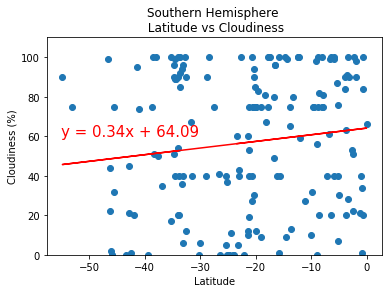

In [15]:
# Create a variable x that contains the X Axis values
x_values = my_imp_southern_hemisphere_df["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_southern_hemisphere_df["Cloudiness"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(0, 110)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Cloudiness (%)")

# Assign a Title to the Scatter Plot
plt.title("Southern Hemisphere \n Latitude vs Cloudiness")



#=============================================================
# Use a Custom Function "run_linear_regression" 
#=============================================================

# Run the custom function and assign the results to a variable 
my_LR_dict_SH_cloudiness_lat = run_linear_regression(x_values,y_values)

# Plot the Regression Line on the Scatter Plot 
plt.plot(x_values,my_LR_dict_SH_cloudiness_lat["regress_values"],"-", color="red")

# Plot the Equatrion of the Regression Line on the Scatter Plot
plt.annotate(my_LR_dict_SH_cloudiness_lat["line_eq"],(-55, 60),fontsize=15,color="red")

# Print the correlation coefficient (R), the coefficient of determination (R Squared) and the equation of the Regression Line
print( "The Regression Line equation is: Cloudiness = " + str(round((my_LR_dict_SH_cloudiness_lat["slope"]),2)) + " times Latitude + " + str(round((my_LR_dict_SH_cloudiness_lat["intercept"]),2)) ) 
print( "The Correlation (R) between Latitude and Cloudiness is: " + str(round((my_LR_dict_SH_cloudiness_lat["rvalue"]),2))  ) 
print( "The Coefficient of Determination (R-Squared) between Latitude and Cloudiness is " + str( round( round((my_LR_dict_SH_cloudiness_lat["rvalue"]),2) * round((my_LR_dict_SH_cloudiness_lat["rvalue"]),2),4) )) 

#=============================================================
# End of use of the Custom Function
#=============================================================



# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_SOUTHERN_HEMISPHERE_Latitude_vs_Cloudiness.png")

# Display the Scatter plot 
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Regression Line equation is: Wind Speed = 0.08 times Latitude + 5.72
The Correlation (R) between Latitude and Wind Speed is: 0.27
The Coefficient of Determination (R-Squared) between Latitude and Wind Speed is 0.0729


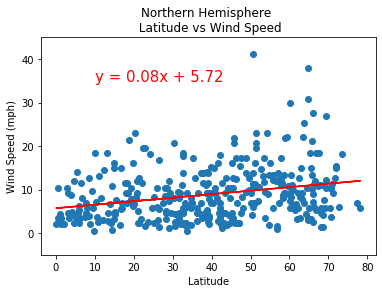

In [16]:
# Create a variable x that contains the X Axis values
x_values = my_imp_northern_hemisphere_df["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_northern_hemisphere_df["Wind Speed"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(-5, 45)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Wind Speed (mph)")

# Assign a Title to the Scatter Plot
plt.title("Northern Hemisphere \n Latitude vs Wind Speed")



#=============================================================
# Use a Custom Function "run_linear_regression" 
#=============================================================

# Run the custom function and assign the results to a variable 
my_LR_dict_NH_windspeed_lat = run_linear_regression(x_values,y_values)

# Plot the Regression Line on the Scatter Plot 
plt.plot(x_values,my_LR_dict_NH_windspeed_lat["regress_values"],"-", color="red")

# Plot the Equatrion of the Regression Line on the Scatter Plot
plt.annotate(my_LR_dict_NH_windspeed_lat["line_eq"],(10,35),fontsize=15,color="red")

# Print the correlation coefficient (R), the coefficient of determination (R Squared) and the equation of the Regression Line
print( "The Regression Line equation is: Wind Speed = " + str(round((my_LR_dict_NH_windspeed_lat["slope"]),2)) + " times Latitude + " + str(round((my_LR_dict_NH_windspeed_lat["intercept"]),2)) ) 
print( "The Correlation (R) between Latitude and Wind Speed is: " + str(round((my_LR_dict_NH_windspeed_lat["rvalue"]),2))  ) 
print( "The Coefficient of Determination (R-Squared) between Latitude and Wind Speed is " + str( round( round((my_LR_dict_NH_windspeed_lat["rvalue"]),2) * round((my_LR_dict_NH_windspeed_lat["rvalue"]),2),4) )) 

#=============================================================
# End of use of the Custom Function
#=============================================================



# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_NORTHERN_HEMISPHERE_Latitude_vs_WindSpeed.png")

# Display the Scatter plot 
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Regression Line equation is: Wind Speed = -0.12 times Latitude + 5.12
The Correlation (R) between Latitude and Wind Speed is: -0.32
The Coefficient of Determination (R-Squared) between Latitude and Wind Speed is 0.1024


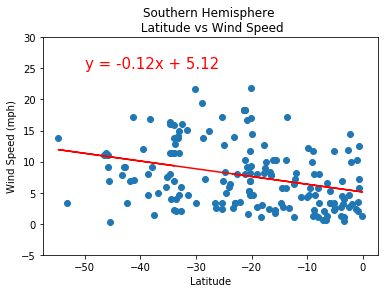

In [17]:
# Create a variable x that contains the X Axis values
x_values = my_imp_southern_hemisphere_df["Lat"]

# Create a variable y that contains the Y Axis values
y_values = my_imp_southern_hemisphere_df["Wind Speed"]

# Create a scatter plot that plots the X Axis values vs the Y Axis values
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(-5, 30)

# Set the X Axis Label
plt.xlabel("Latitude")

# Set the Y Axis Label
plt.ylabel("Wind Speed (mph)")

# Assign a Title to the Scatter Plot
plt.title("Southern Hemisphere \n Latitude vs Wind Speed")



#=============================================================
# Use a Custom Function "run_linear_regression" 
#=============================================================

# Run the custom function and assign the results to a variable 
my_LR_dict_SH_windspeed_lat = run_linear_regression(x_values,y_values)

# Plot the Regression Line on the Scatter Plot 
plt.plot(x_values,my_LR_dict_SH_windspeed_lat["regress_values"],"-", color="red")

# Plot the Equatrion of the Regression Line on the Scatter Plot
plt.annotate(my_LR_dict_SH_windspeed_lat["line_eq"],(-50,25),fontsize=15,color="red")

# Print the correlation coefficient (R), the coefficient of determination (R Squared) and the equation of the Regression Line
print( "The Regression Line equation is: Wind Speed = " + str(round((my_LR_dict_SH_windspeed_lat["slope"]),2)) + " times Latitude + " + str(round((my_LR_dict_SH_windspeed_lat["intercept"]),2)) ) 
print( "The Correlation (R) between Latitude and Wind Speed is: " + str(round((my_LR_dict_SH_windspeed_lat["rvalue"]),2))  ) 
print( "The Coefficient of Determination (R-Squared) between Latitude and Wind Speed is " + str( round( round((my_LR_dict_SH_windspeed_lat["rvalue"]),2) * round((my_LR_dict_SH_windspeed_lat["rvalue"]),2),4) )) 

#=============================================================
# End of use of the Custom Function
#=============================================================



# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_SOUTHERN_HEMISPHERE_Latitude_vs_WindSpeed.png")

# Display the Scatter plot 
plt.show()
